In [1]:
import os, inspect, sys
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import datetime as dt
from dateutil.relativedelta import relativedelta

import plotly.plotly as py
import plotly.graph_objs as go


CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)

from reb.src.pyts import series_to_supervised

Using TensorFlow backend.


In [2]:
# monthly date range generator
def month_range(start_date, n_months):
    for m in range(n_months):
        yield start_date + relativedelta(months=+m)
        
# get all combinations of input iterable x
def get_combinations(x, k=None):
    rval = []
    if k is None:
        for L in range(1, len(x)+1):
            for subset in itertools.combinations(x, L):
                rval.apend(list(subset))
    else:
        for subset in itertools.combinations(x, k):
            rval.append(list(subset))
            
    return rval      

In [3]:
# read data
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df_original = pd.read_csv(ffname, parse_dates=["DATE"])
df_original.DATE = pd.to_datetime(df_original.DATE, format="%Y-%m")
df_original.head()

# Make a clean copy of data
df = df_original.copy() 

# Reindex data frame per the time stamps
df.set_index("DATE", inplace=True)
df.head()

,PAYEMS,AWHNONAG,CES9091000001,USGOVT,UNEMPLOY,LNS13023706,MVPHGFD027MNFRBDAL,MNFCTRIRSA,MORTGAGE30US,MORTGAGE15US,DGS10,INDPRO,CMRMTSPL,W875RX1
DATE,,,,,,,,,,,,,,
1992-01-01,108374,34.1,3137,18688,9283,11.9,2719.3,1.66,8.4,8.0,7.0,63.3372,757479.217,6840.9
1992-02-01,108317,34.1,3121,18689,9454,9.8,2738.8,1.65,8.8,8.4,7.3,63.7864,759384.431,6879.1
1992-03-01,108369,34.1,3121,18715,9460,9.5,2760.5,1.58,8.9,8.6,7.5,64.3199,762440.896,6884.7
1992-04-01,108526,34.3,3117,18739,9415,10.4,2764.0,1.57,8.9,8.5,7.5,64.8069,767521.889,6903.6
1992-05-01,108653,34.3,3119,18753,9744,10.3,2830.7,1.55,8.7,8.3,7.4,65.0202,760844.122,6941.7


model: f.1.2.3.4.5.6.7.8.9.10.11.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 29ms/step - loss: 0.3019 - val_loss: 0.6861
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2388 - val_loss: 0.5916
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1918 - val_loss: 0.5045
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1519 - val_loss: 0.4255
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1180 - val_loss: 0.3546
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0904 - v

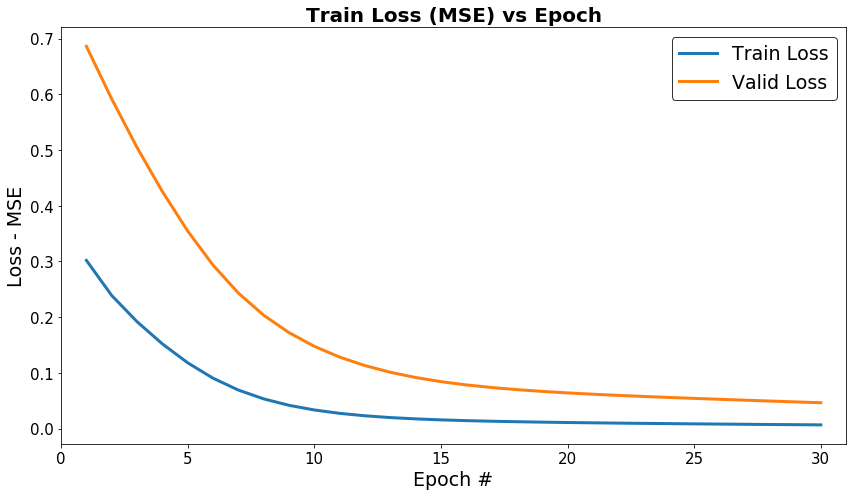

model: f.1.2.3.4.5.6.7.8.9.10.12.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 28ms/step - loss: 0.3482 - val_loss: 0.7639
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2757 - val_loss: 0.6586
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2237 - val_loss: 0.5643
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1784 - val_loss: 0.4738
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1385 - val_loss: 0.3897
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1058 - v

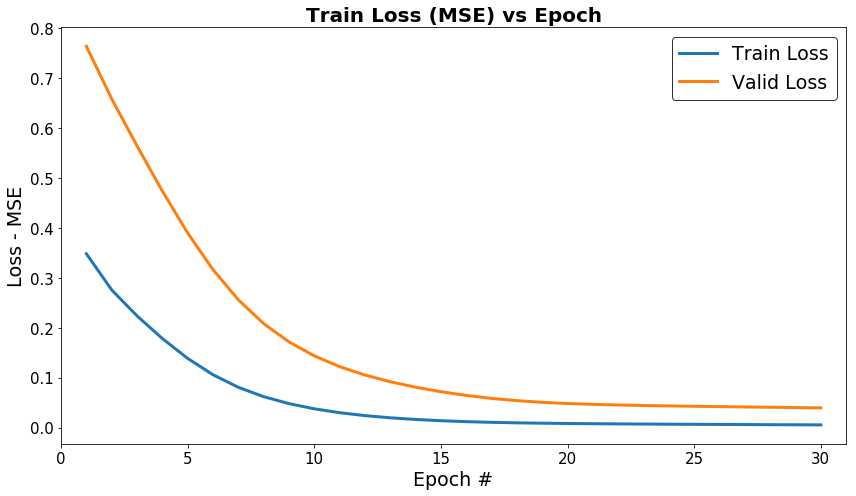

model: f.1.2.3.4.5.6.7.8.9.10.13.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 28ms/step - loss: 0.3372 - val_loss: 0.9068
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2772 - val_loss: 0.8105
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2276 - val_loss: 0.7141
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1767 - val_loss: 0.6028
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1248 - val_loss: 0.4713
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0817 - v

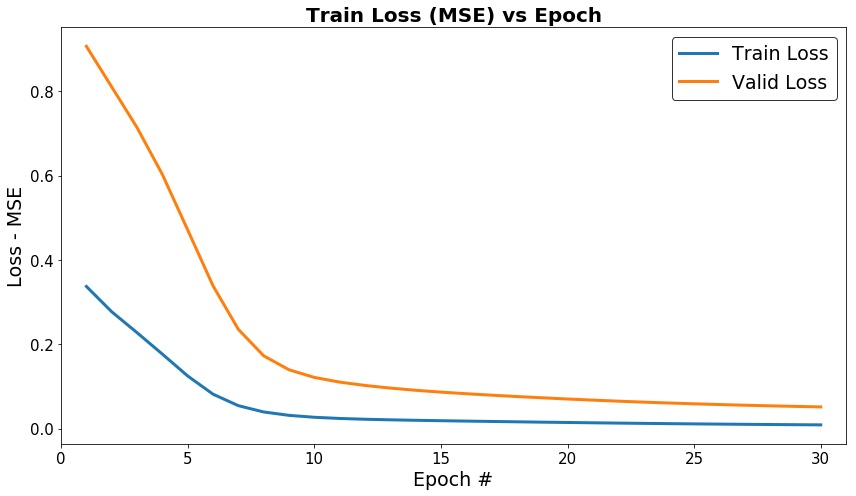

model: f.1.2.3.4.5.6.7.8.9.11.12.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.3473 - val_loss: 0.7686
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2472 - val_loss: 0.6118
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1737 - val_loss: 0.4731
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1226 - val_loss: 0.3653
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0886 - val_loss: 0.2883
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0650 - v

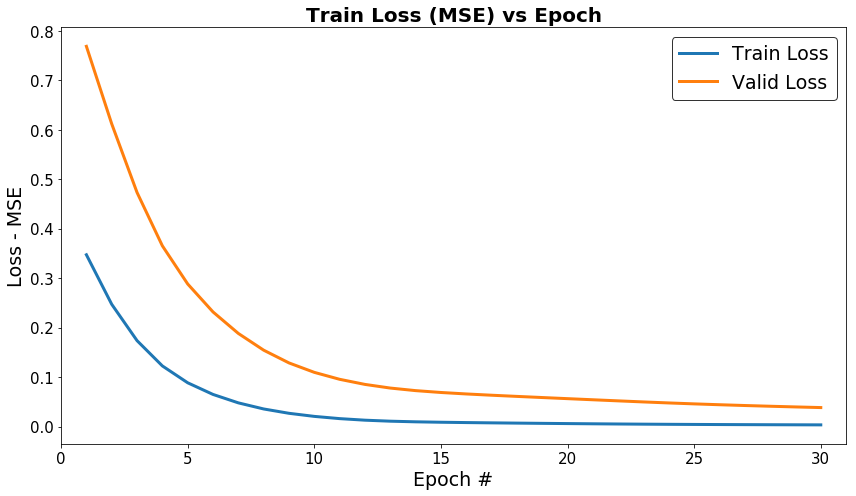

model: f.1.2.3.4.5.6.7.8.9.11.13.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.3111 - val_loss: 0.6576
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2518 - val_loss: 0.5748
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2081 - val_loss: 0.4972
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1675 - val_loss: 0.4183
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1296 - val_loss: 0.3407
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0958 - v

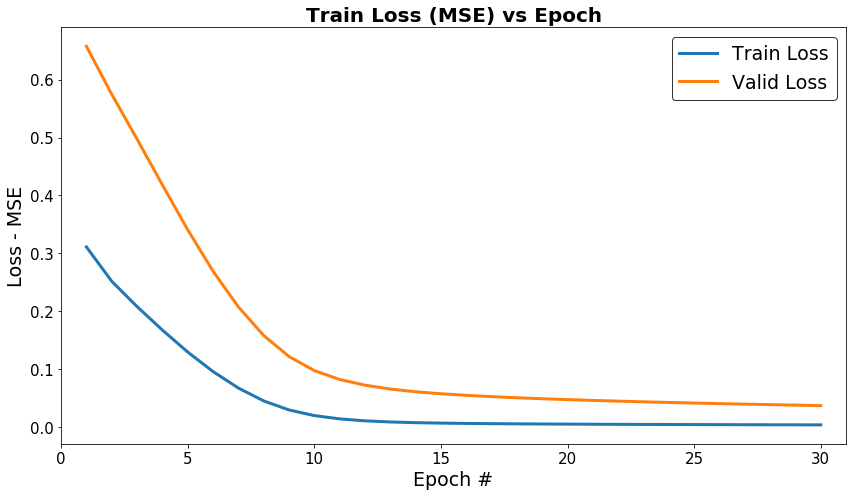

model: f.1.2.3.4.5.6.7.8.9.12.13.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.3120 - val_loss: 0.7810
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2482 - val_loss: 0.6699
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1985 - val_loss: 0.5598
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1550 - val_loss: 0.4536
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1167 - val_loss: 0.3590
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0834 - v

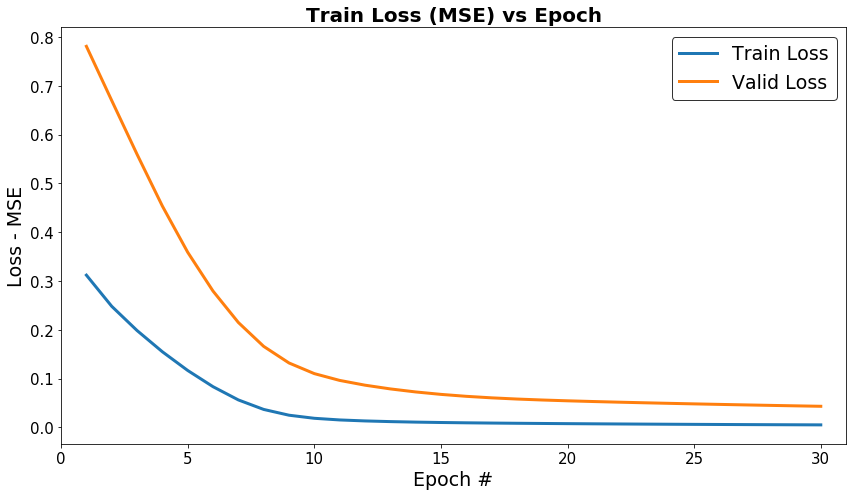

model: f.1.2.3.4.5.6.7.8.10.11.12.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 31ms/step - loss: 0.4030 - val_loss: 0.8320
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.3060 - val_loss: 0.7048
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2337 - val_loss: 0.5881
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1773 - val_loss: 0.4793
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1326 - val_loss: 0.3814
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0980 - 

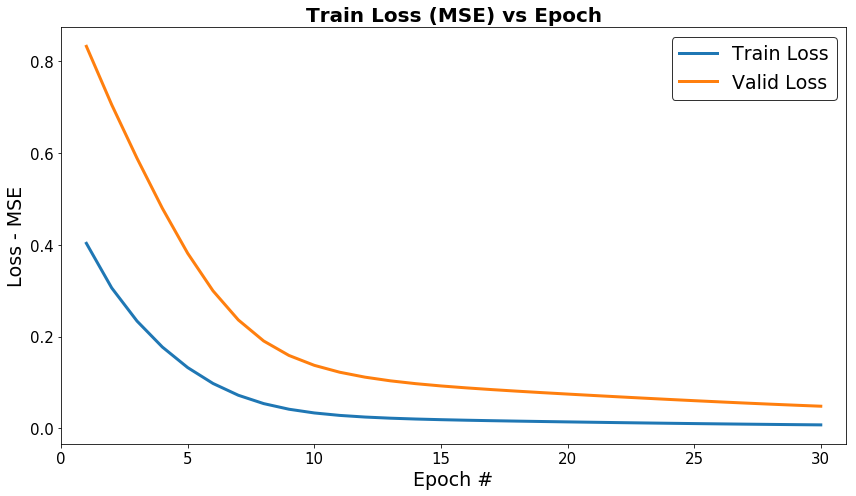

model: f.1.2.3.4.5.6.7.8.10.11.13.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 60s 235ms/step - loss: 0.4094 - val_loss: 0.9101
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.3220 - val_loss: 0.7770
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2587 - val_loss: 0.6624
Epoch 4/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2077 - val_loss: 0.5573
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1646 - val_loss: 0.4615
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1292 

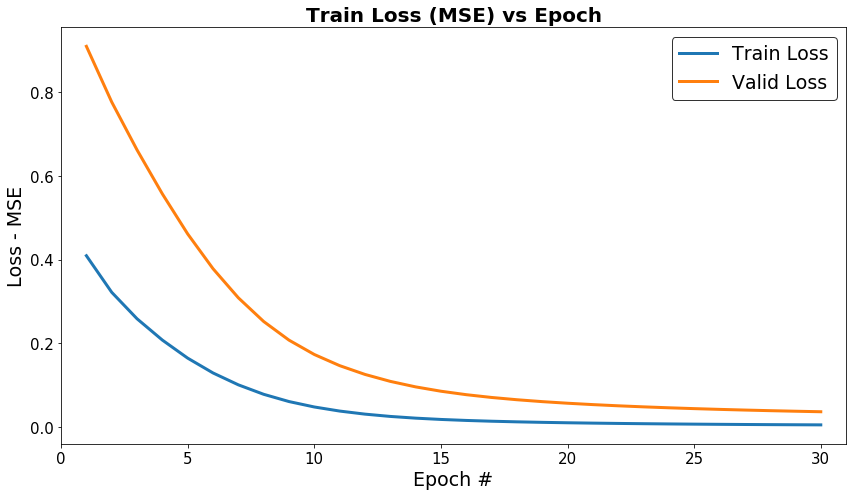

model: f.1.2.3.4.5.6.7.8.10.12.13.t.0.l.24.s.18.u.10.h5
Train Inputs Shape: (255, 504)
Valid Inputs Shape: (23, 504)
Train Inputs Shape: (255, 288), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 288), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 12), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 12), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30


In [ ]:
for index_target in [0, 11, 12, 13]:
    # Rescale data
    all_values = df.values.astype("float32")
    scaler = MinMaxScaler(feature_range=(0, 1))
    all_values_scaled = scaler.fit_transform(all_values)

    # # USRECM: NBER based Recession Indicators for the United States from the Peak through the Trough
    # # index_target = NA

    # # GDPC1: Real Gross Domestic Product
    # # index_target = NA

    # # PAYEMS: All Employees: Total Nonfarm Payrolls
    # index_target = 0

    # # INDPRO: Industrial Production Index
    # index_target = 11

    # # CMRMTSPL: Real Manufacturing and Trade Industries Sales
    # index_target = 12

    # # W875RX1: Real personal income excluding current transfer receipts
    # index_target = 13


    variable_label = df.columns[index_target]
    features = list(range(all_values_scaled.shape[1]))
    features.remove(index_target)
    feature_combinations = get_combinations(features, 11)
#     feature_combinations = [0, 1, 2]
#     if index_target in feature_combinations: 
#         feature_combinations.remove(index_target)
#     feature_combinations = [feature_combinations]
#     feature_combinations
    

    for j in range(len(feature_combinations)):
    # for j in range(5):
        n_lags = 24
        n_sequences = 18
        n_units = 10
        comb = feature_combinations[j]
        fname = 'f.' +'.'.join([str(elem) for elem in comb]) + \
            f'.t.{index_target}.l.{n_lags}.s.{n_sequences}.u.{n_units}' + '.h5'

        print(f"model: {fname}")



        values_scaled = all_values_scaled[:, comb + [index_target]]
        n_variables = values_scaled.shape[1]
        # set model parameters
        n_train = int(values_scaled.shape[0] * 0.8)

        # set train parameters
        optimizer = "adam"
        loss = "mse"
        n_epochs = 30
        sz_batch = 20
        verbose = 1

        df_reframed = series_to_supervised(values_scaled, n_lags, n_sequences)

        # [print(elem) for elem in df_reframed.columns]

        # create train/valid data
        # split into train and test sets
        values = df_reframed.values
        train_values, valid_values = values[:n_train, :], values[n_train:, :]
        print(f"Train Inputs Shape: {train_values.shape}")
        print(f"Valid Inputs Shape: {valid_values.shape}")

        # split into input and targets
        n_train, n_ = train_values.shape
        n_valid, n_ = valid_values.shape
        n_features = n_lags * n_variables

        x_train, y_train = train_values[:, :n_features], train_values[:, n_features+n_variables-1:n_:n_variables]
        x_valid, y_valid = valid_values[:, :n_features], valid_values[:, n_features+n_variables-1:n_:n_variables]
        print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
        print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")

        # reshape data as required by ltsm
        x_train = x_train.reshape((n_train, n_lags, n_variables))
        x_valid = x_valid.reshape((n_valid, n_lags, n_variables))
        print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
        print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")

        # build model
        model = Sequential()
        model.add(LSTM(n_units, input_shape=(n_lags, n_variables)))
        model.add(Dense(n_sequences))
        model.compile(loss=loss, optimizer=optimizer)

        # train model
        history = model.fit(x_train, y_train,
                            epochs=n_epochs,
                            batch_size=sz_batch,
                            validation_data=(x_valid, y_valid),
                            verbose=verbose,
                            shuffle=False)
       # Creates a HDF5 file 'my_model.h5'
        ffname = os.path.join(ROOT_DIR, "reb", "data", "int", fname)
        model.save(ffname)

        # plot history
        figsize = (12, 7)
        titlefontsize = 20
        xtickfontsize = 15
        ytickfontsize = 15
        labelfontsize = 19
        legendfontsize = 19
        linewidth = 3
        fig = plt.figure(figsize=figsize)
        ax = fig.subplots(1, 1)
        ax.plot(np.arange(1, n_epochs+1), history.history['loss'],
                "-",
                linewidth=linewidth,
                label='Train Loss')
        ax.plot(np.arange(1, n_epochs+1), history.history['val_loss'],
                "-",
                linewidth=linewidth,
                label='Valid Loss')
        ax.set_xlabel("Epoch #", fontsize=labelfontsize)
        ax.set_ylabel("Loss - " + loss.upper(), fontsize=labelfontsize)
        ax.tick_params(
            axis='x',          
            which='both',      
            labelsize=xtickfontsize)
        ax.tick_params(
            axis='y',    
            labelsize=ytickfontsize)
        ax.set_title("Train Loss " +  f"({loss})".upper() + " vs Epoch",
                fontsize=titlefontsize,
                fontweight="bold"
            )
        ax.legend(loc="upper right",
                  fontsize=legendfontsize,
                  framealpha=0.8,
                  fancybox=True,
                  frameon=True,
                  shadow=False,
                  edgecolor="k")
        ax.set_xlim([0, n_epochs+1])
        plt.tight_layout()
    #     fname = f"loss-plot-valid.png"
        # fig.savefig(os.path.join(ROOT_DIR, "reports", "figures", fname), transparent=False, dpi=dpi)
        plt.show()
        del model